# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dados = pd.read_csv(r"C:\Users\Davi Ruas\Documents\Ebac\Cientista de dados\Modulo 6\Exercicios\SINASC_RO_2019.csv", sep=",")

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [116]:
dados.loc[(dados['APGAR5'] >= 0) & (dados['APGAR5'] <= 3), 'APGAR5_cat'] = 'Asfixia grave'

dados.loc[(dados['APGAR5'] >= 4) & (dados['APGAR5'] <= 5), 'APGAR5_cat'] = 'Asfixia moderada'

dados.loc[(dados['APGAR5'] >= 6) & (dados['APGAR5'] <= 7), 'APGAR5_cat'] = 'Asfixia leve'

dados.loc[(dados['APGAR5'] >= 8) & (dados['APGAR5'] <= 10), 'APGAR5_cat'] = 'normal'

dados['APGAR5_cat']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR5_cat, Length: 27028, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

[Text(0, 0, '37 a 41 semanas'),
 Text(1, 0, '42 semanas e mais'),
 Text(2, 0, '32 a 36 semanas'),
 Text(3, 0, '22 a 27 semanas'),
 Text(4, 0, '28 a 31 semanas'),
 Text(5, 0, 'Menos de 22 semanas')]

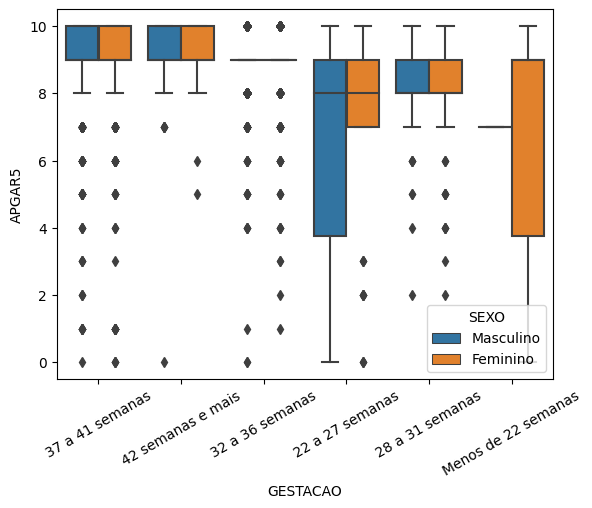

In [139]:
APGAR5 = dados['APGAR5'].dropna()
GESTACAO = dados['GESTACAO'].dropna()

a = sns.boxplot(data = dados, y=APGAR5, x=GESTACAO, orient="v", hue='SEXO')
a.set_xticklabels(a.get_xticklabels(),rotation=30)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [136]:
#A partir daqui usarei a variavel APGAR_cat para melhor visualização.
gestacao = dados['GESTACAO']
apgar5 = dados['APGAR5_cat']

df = dados.groupby([gestacao, apgar5]).size().unstack(1)
df = df.fillna(0)
df

APGAR5_cat,Asfixia grave,Asfixia leve,Asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,21.0,12.0,1.0,51.0
28 a 31 semanas,3.0,18.0,12.0,129.0
32 a 36 semanas,8.0,73.0,19.0,2134.0
37 a 41 semanas,33.0,196.0,28.0,22266.0
42 semanas e mais,1.0,6.0,1.0,690.0
Menos de 22 semanas,2.0,1.0,0.0,4.0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [133]:
freq = pd.crosstab(gestacao,  apgar5)
freq_pctlin = freq.div(freq.sum(axis = 1), axis = 0)
freq_pctlin

APGAR5_cat,Asfixia grave,Asfixia leve,Asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot: xlabel='GESTACAO'>

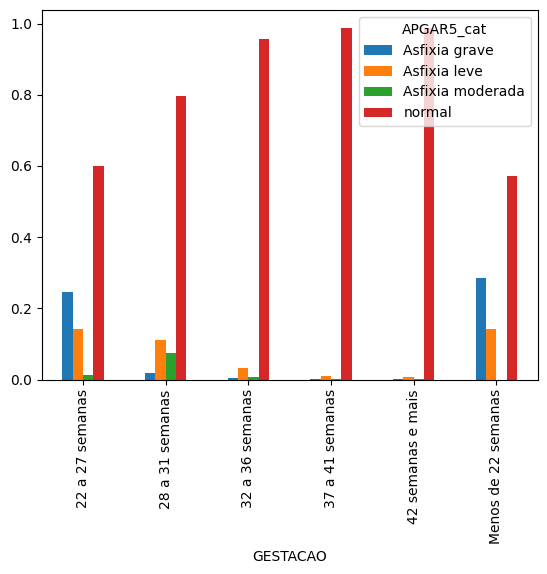

In [134]:
freq_pctlin.plot.bar()

#Levando em consideração o grafico gerado podemos perceber que para criancas com menos de 37 semanas de gestação 
# possui uma queda significativa na frequencia de APGAR5 = 10 e um aumento na frequencia de APGAR5 = 8,
# mas não podemos afirmar com certeza a afirmação acima.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

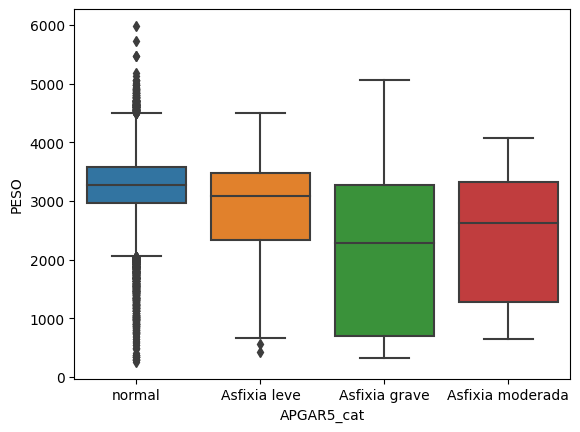

In [122]:
a2 = sns.boxplot(x="APGAR5_cat", y="PESO", data=dados)
#Podemos perceber que provevelmente existe sim uma correlação entre  PESO e APGAR5, pois é perceptivel queexiste uma maior
#concetração de bebês com asfixias mais severas e pesos mais baixos.